In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import plot

In [2]:
# load data
BTC = pd.read_csv('..\\Data\\BTC_clean.csv')

# adjust df to fit Prophet requirements
BTC = BTC[["Date", "Adj Close"]]
BTC.columns = ["ds", "y"]
BTC.head()

,ds,y
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991


In [3]:
# initialize and fit Prophet model
prophet = Prophet(daily_seasonality = True)
prophet.fit(BTC)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
# predict 180 forecast
future = prophet.make_future_dataframe(periods = 180)
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2048,2021-08-10,35948.723175,30218.901531,41656.269639
2049,2021-08-11,36035.594340,30108.923348,41801.517742
2050,2021-08-12,36093.519113,30522.874539,42360.914402
2051,2021-08-13,36176.287768,30404.318393,41836.699927
2052,2021-08-14,36249.948710,30785.529531,42091.995141


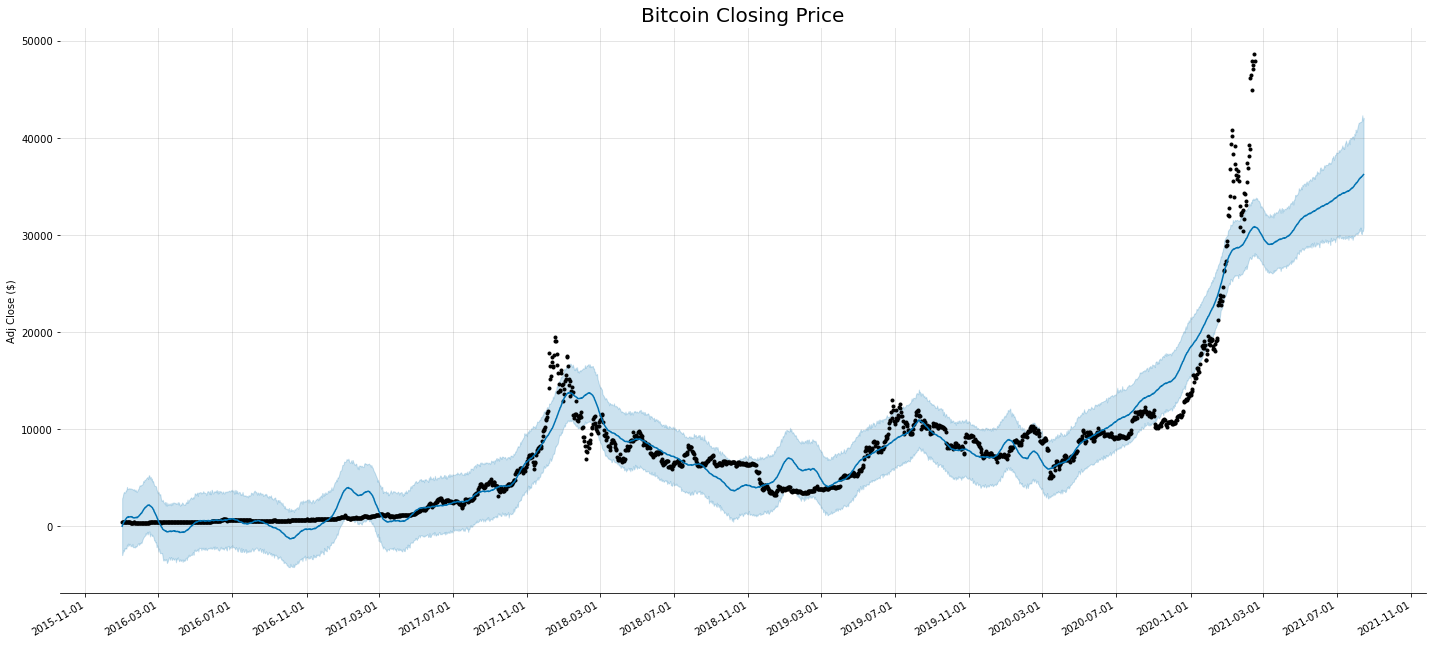

In [5]:
# plot data
fig = prophet.plot(forecast, figsize=(20, 10))
ax = fig.gca()
ax.set_title("Bitcoin Closing Price", fontsize = 20)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Rotation
ax.set_xlabel(None)
ax.set_ylabel("Adj Close ($)")
sns.despine(left = True)
plt.show()

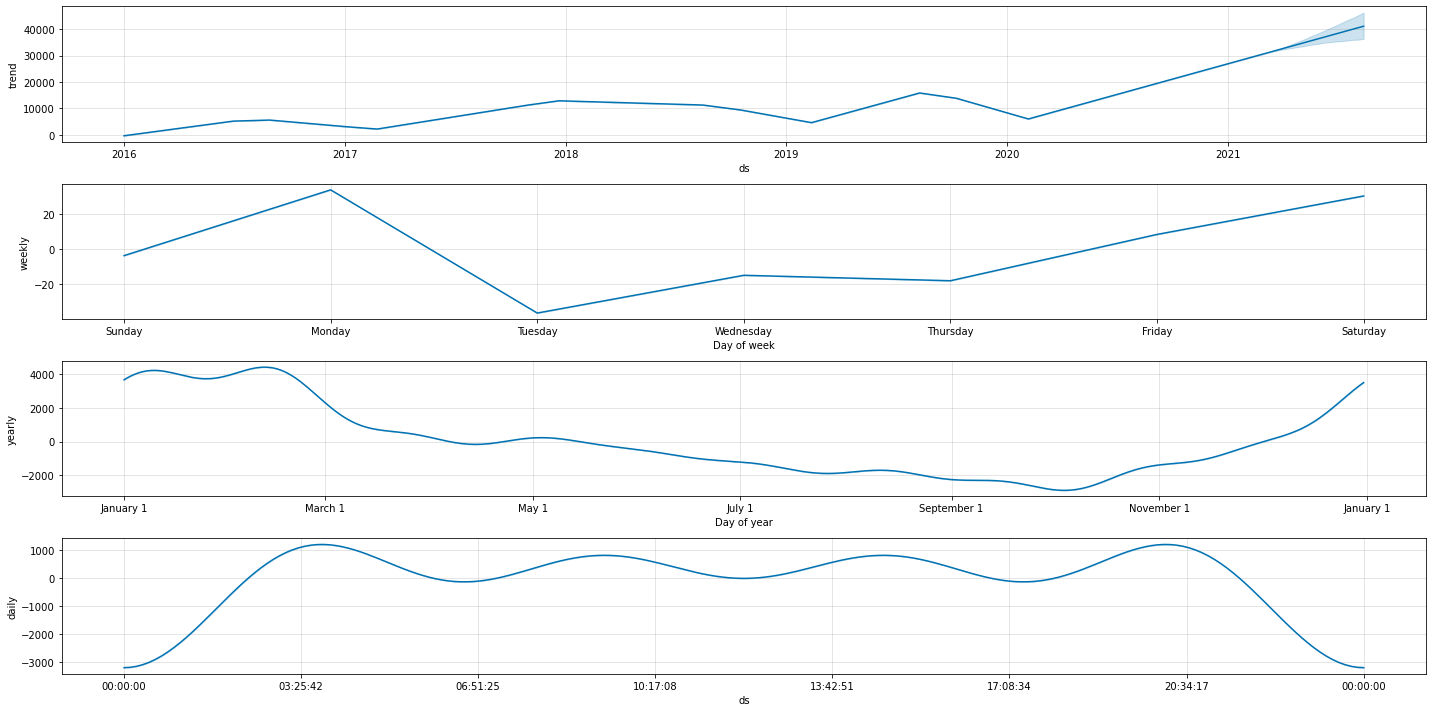

In [6]:
# plot components of forecast
fig = prophet.plot_components(forecast, figsize=(20, 10))
plt.show()

In [7]:
# cross validation
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '180 days')
df_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2018-03-03 00:00:00 and 2020-08-19 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-04,11991.468438,10675.217816,13260.690275,11512.599609,2018-03-03
1,2018-03-05,12019.827421,10829.004965,13261.957646,11573.299805,2018-03-03
2,2018-03-06,12024.179429,10801.612556,13290.195093,10779.900391,2018-03-03
3,2018-03-07,12041.849365,10817.770669,13355.162875,9965.570313,2018-03-03
4,2018-03-08,12058.201276,10937.039459,13258.247602,9395.009766,2018-03-03


In [8]:
# run metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,18 days,2.874091e+06,1695.314517,1446.457356,0.192692,0.150473,0.527778
1,19 days,3.019872e+06,1737.777978,1493.425316,0.200517,0.154190,0.509259
2,20 days,3.315254e+06,1820.784020,1562.586335,0.214201,0.157978,0.490741
3,21 days,3.561501e+06,1887.194077,1620.598897,0.225594,0.161909,0.481481
4,22 days,3.822548e+06,1955.133876,1677.546543,0.237689,0.163581,0.462963


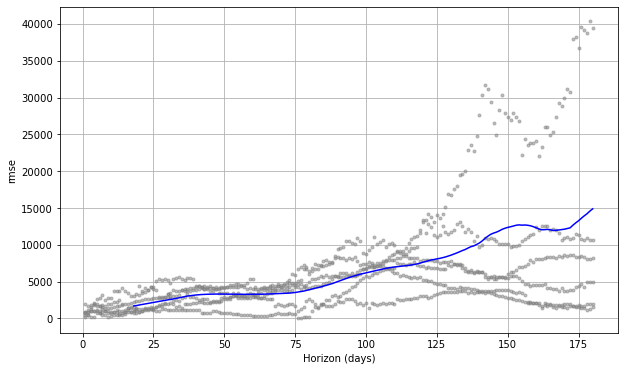

In [9]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()